In [9]:
from matplotlib import pyplot as plt

# first complication

In [62]:
from scipy.integrate import solve_ivp

a1,a2 = 0.1, 0.05
b1, b2, b3 = 0.45, 0.04, 0.001


def rhs(t, y): 
    global a1,a2,b1,b2,b3
    return [
        -y[0]*(a1+b1), # A,
        y[0]*a1 - y[1]*(a2+b2), # B,
        y[1]*a2 - y[2]*b3 # C,
    ]

res = solve_ivp(rhs, (0, 100), [5, 5, 5])

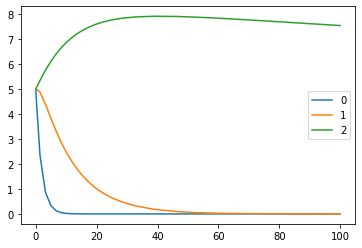

In [63]:
for i in range(3):
    plt.plot(
        res.t,
        res.y[i],
        label=i
    )
plt.legend()

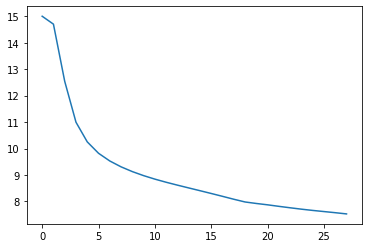

In [64]:
plt.plot(res.y[0]+res.y[1]+res.y[2])

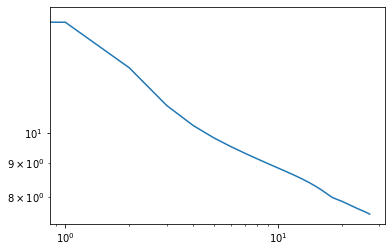

In [65]:
plt.plot(res.y[0]+res.y[1]+res.y[2])
plt.xscale('log')
plt.yscale('log')

# replicate their biexponential

In [28]:
from scipy.integrate import solve_ivp

a1 = 0.01
b1, b2 = 0.45, 0.04

def rhs(t, y): 
    global a1,a2,b1,b2,b3
    return [
        -y[0]*(a1+b1), # A,
        y[0]*a1 - y[1]*(b2), # B,
    ]

res = solve_ivp(rhs, (0, 100), [1.5, 0])

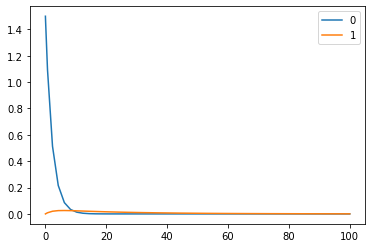

In [31]:
for i in range(2):
    plt.plot(
        res.t,
        res.y[i],
        label=i
    )
plt.legend()

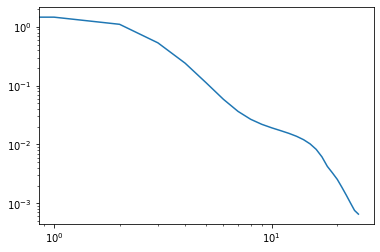

In [34]:
plt.plot(res.y[0]+res.y[1])
plt.xscale('log')
plt.yscale('log')

# more complicated

In [121]:
from random import random, randint
from collections import defaultdict

r = defaultdict(int)

# people are reciprocally connected to n1-n4
p_attach = 0.5
for i in range(5):
    r[ ('PPL', f'n{i}') ] = r[ (f'n{i}', 'PPL') ] = p_attach
    
# n5 and n6 are potential stores
for i in range(7):
    r[ (f'n{i}', 'DED') ] = random()
    
# connected nodes //
for K in range(6):
    n1 = f'n{randint(0,5)}'
    n2 = f'n{randint(0,5)}'
    r[ (n1,n2) ] = random()

In [122]:
things = sorted({k for k,_ in r.keys()}.union({k for _,k in r.keys()}))

In [218]:
r

defaultdict(int,
            {('PPL', 'n0'): 0.5,
             ('n0', 'PPL'): 0.5,
             ('PPL', 'n1'): 0.5,
             ('n1', 'PPL'): 0.5,
             ('PPL', 'n2'): 0.5,
             ('n2', 'PPL'): 0.5,
             ('PPL', 'n3'): 0.5,
             ('n3', 'PPL'): 0.5,
             ('PPL', 'n4'): 0.5,
             ('n4', 'PPL'): 0.5,
             ('n0', 'DED'): 0.8816023230783222,
             ('n1', 'DED'): 0.9822077140675416,
             ('n2', 'DED'): 0.5060502055787187,
             ('n3', 'DED'): 0.18083008447811877,
             ('n4', 'DED'): 0.6681649176311728,
             ('n5', 'DED'): 0.05345071898337528,
             ('n6', 'DED'): 0.7503143100996243,
             ('n5', 'n4'): 0.2166293567091444,
             ('n0', 'n3'): 0.44916637825055117,
             ('n3', 'n1'): 0.2563787384057401,
             ('n1', 'n0'): 0.855115603481849,
             ('n1', 'n1'): 0.31823777466287617,
             ('n3', 'n0'): 0.9398742060538174,
             ('n5', 'PPL'): 0,
 

In [124]:
dropped = 'DED'

In [160]:
things

['DED', 'PPL', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6']

In [126]:
from scipy.integrate import solve_ivp
import numpy as np

def rhs(t, y): 
    global things, r
    return [
        np.sum( [
            r[(n2,n1)] * y[j]
            for j,n2 in enumerate(things)
            if n1 != n2
        ] ) - y[i] * np.sum( [
            r[(n1,n2)]
            for j,n2 in enumerate(things)
            if n1 != n2
        ] )
        for i,n1 in enumerate(things)
    ]

res = solve_ivp(rhs, (0, 100), [random() for n in things])

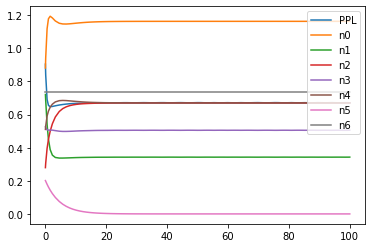

In [127]:
for i in range(len(things)):
    plt.plot(
        res.t,
        res.y[i],
        label=things[i]
    )
plt.legend()

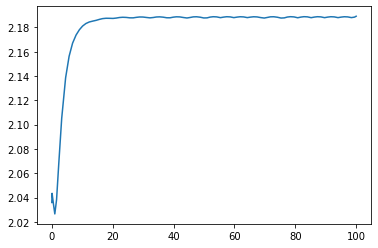

In [128]:
combine = np.sum(np.array([
    res.y[ things.index(n) ]
    for n in ['n1','n2','n3','n4']
]), axis=0)

plt.plot(res.t, combine)

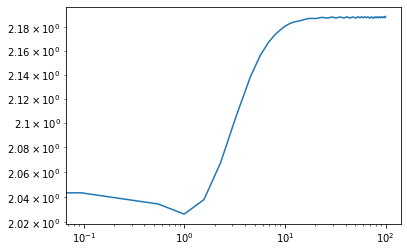

In [129]:
plt.plot(res.t, combine)
plt.xscale('log')
plt.yscale('log')

In [282]:
def generate_random_one():
    from random import random, randint
    from collections import defaultdict

    r = defaultdict(int)

    # people are reciprocally connected to n1-n4
    p_attach = 0.005
    for i in range(5):
        r[ ('PPL', f'n{i}') ] = r[ (f'n{i}', 'PPL') ] = p_attach

    # n5 and n6 are potential stores
    
    # everything dies eventually, except the potential stores
    for i in range(5):
        r[ (f'n{i}', 'DED') ] = random() / 100

    # connected nodes //
    for K in range(10):
        n1 = f'n{randint(0,7)}'
        n2 = f'n{randint(0,7)}'
        r[ (n1,n2) ] = random() / 5

    things = sorted({k for k,_ in r.keys()}.union({k for _,k in r.keys()}))

    dropped = 'DED'
    things_solve = [x for x in things if x != dropped]

    from scipy.integrate import solve_ivp
    import numpy as np

    def rhs(t, y): 
        global things, r
        return [
            np.sum( [
                r[(n2,n1)] * y[j]
                for j,n2 in enumerate(things_solve)
                if n1 != n2
            ] ) - y[i] * np.sum( [
                r[(n1,n2)]
                for j,n2 in enumerate(things)
                if n1 != n2
            ] )
            for i,n1 in enumerate(things_solve)
        ]

    #starts = [random() for n in things_solve]
    starts = [(n in ['n5','n6']) for n in things_solve]
    res = solve_ivp(rhs, (0, 10), starts)
    
    draw_state_graph(r)

    if True:
        for i in range(len(things_solve)):
            plt.plot(
                res.t,
                res.y[i],
                label=things_solve[i]
            )
        plt.legend()
        plt.show()
    
    combine = np.sum(np.array([
        res.y[ things.index(n) ]
        for n in ['n1','n2','n3','n4']
    ]), axis=0)

    plt.plot(res.t, combine)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0,sum(starts))
    plt.show()
    
    plt.plot(res.t, sum(starts) - np.sum(res.y, axis=0))
    plt.show()

In [217]:
things

['DED', 'PPL', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6']

In [283]:
def draw_state_graph(r):

    import networkx as nx
    G = nx.DiGraph()

    G.add_nodes_from(things)
    G.add_weighted_edges_from([
        (a,b,w)
        for (a,b),w in r.items()
        #if 'DED' not in (a,b)
        if w > 0
    ])

    pos = {
        'DED':[-1,0], 
        'PPL':[0,1], 
        'n0':[-1,0.5], 
        'n1':[-0.5,0.5], 
        'n2':[0,0.5], 
        'n3':[0.5,0.5], 
        'n4':[1,0.5], 
        'n5':[-0.5,-1], 
        'n6':[0,-1],
        'n7':[0.5,-1]
    }

    for k in pos:
        pos[k][0] += random()*0.25
        pos[k][1] += random()*0.25

    edges = G.edges()
    weights = [G[u][v]['weight'] for u,v in edges]

    plt.figure(figsize=(5,10))

    #nx.draw_networkx_nodes(G,pos=pos, node_size=0)
    nx.draw_networkx_labels(G,pos=pos,font_size=15, font_color="black")
    nx.draw_networkx_edges(G,pos=pos, edge_color=weights, edge_cmap=plt.cm.Blues, connectionstyle="arc3,rad=0.05", node_size=1000, width=3);
    plt.show()

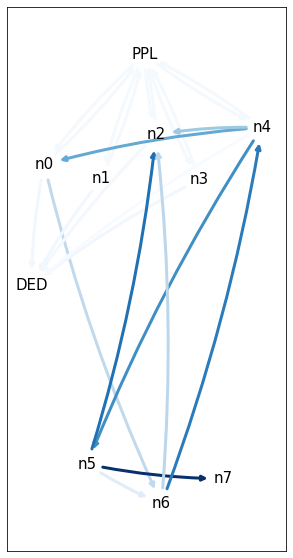

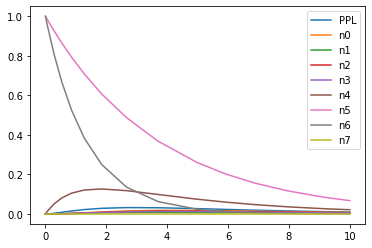

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


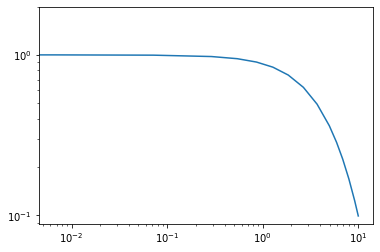

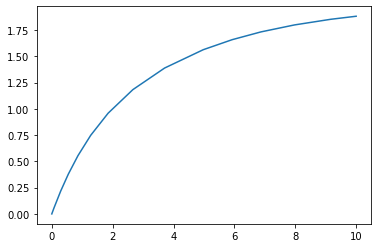

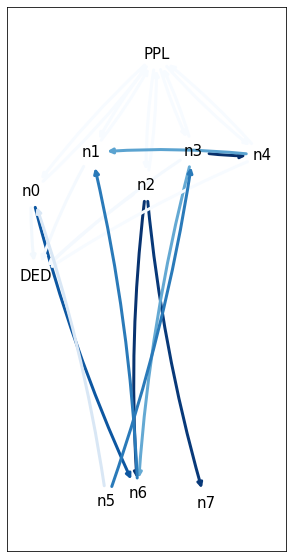

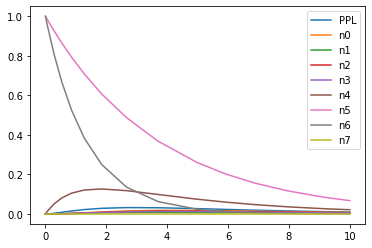

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


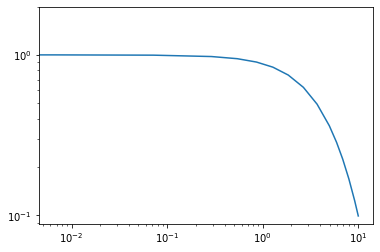

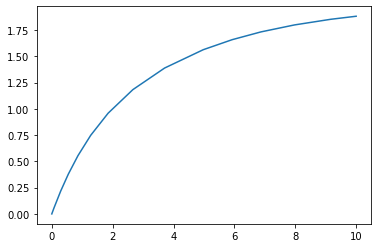

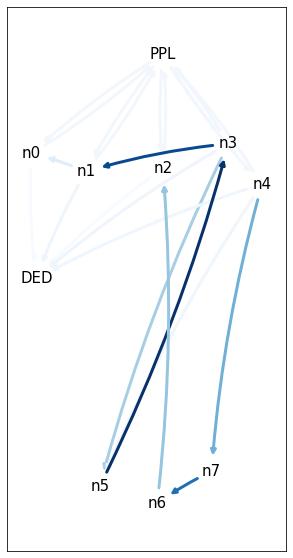

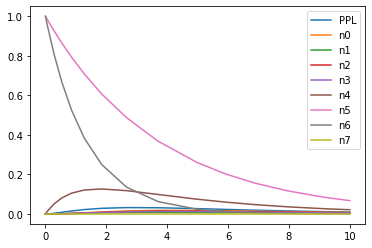

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


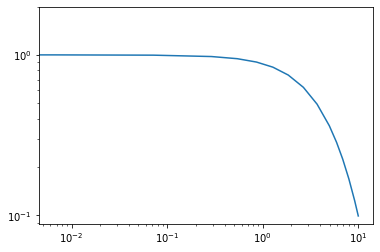

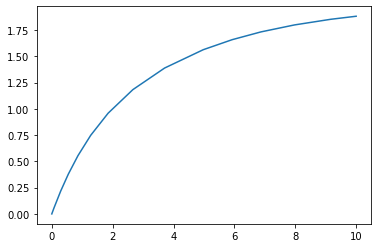

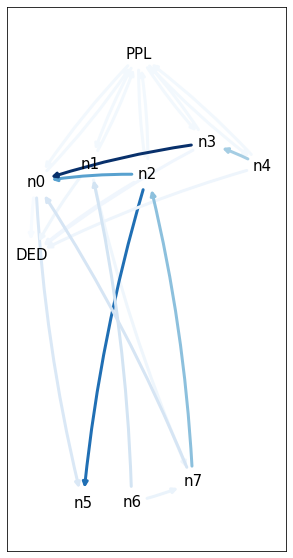

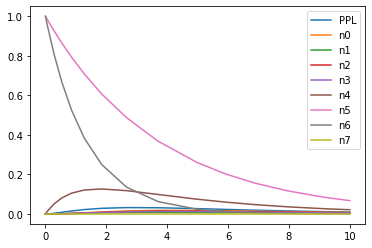

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


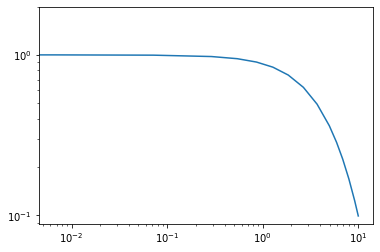

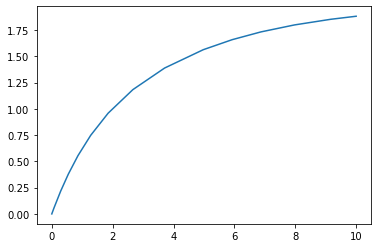

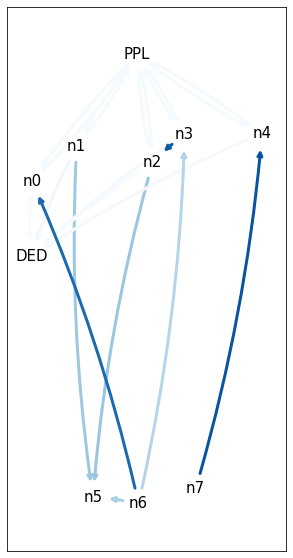

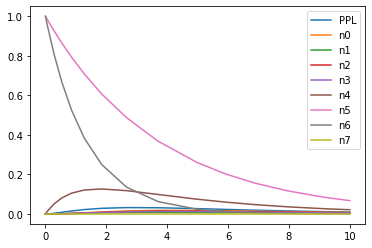

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


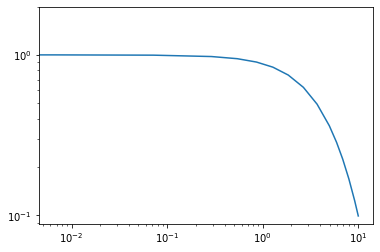

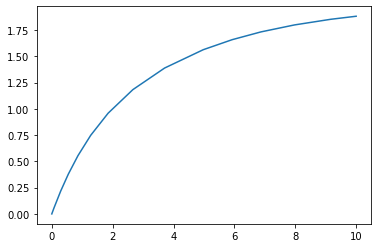

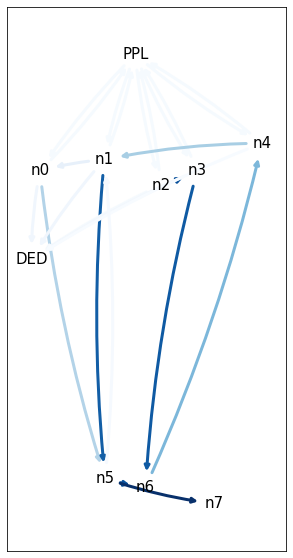

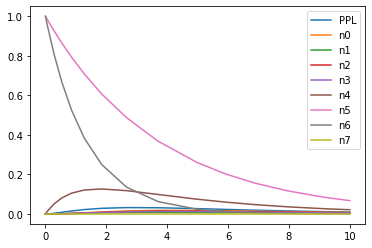

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


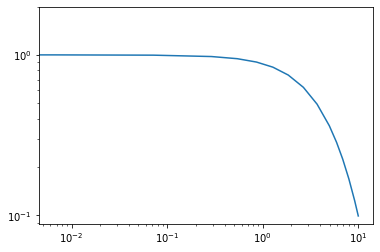

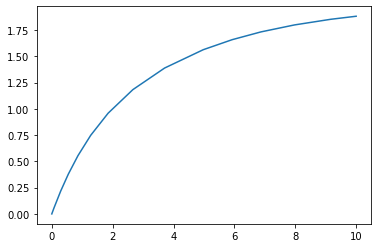

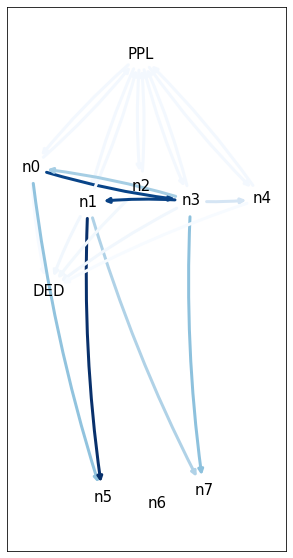

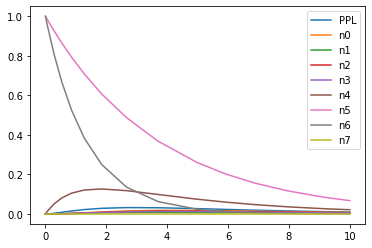

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


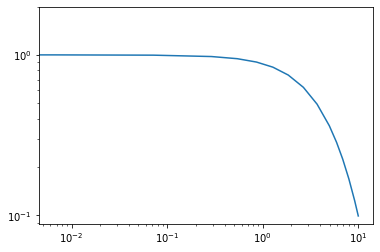

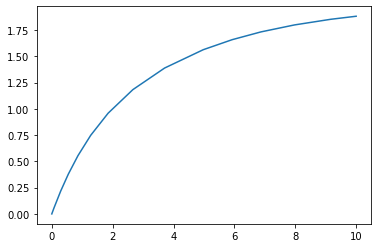

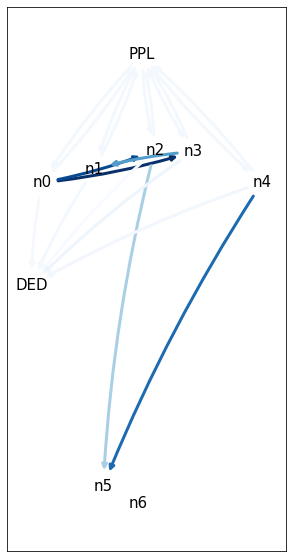

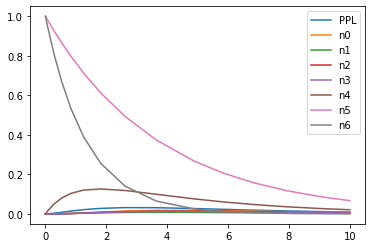

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


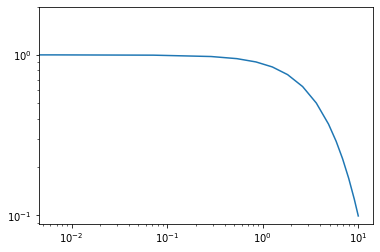

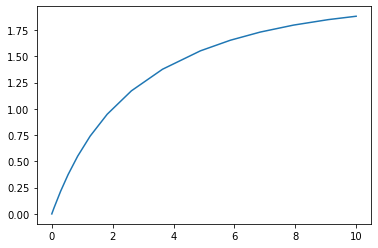

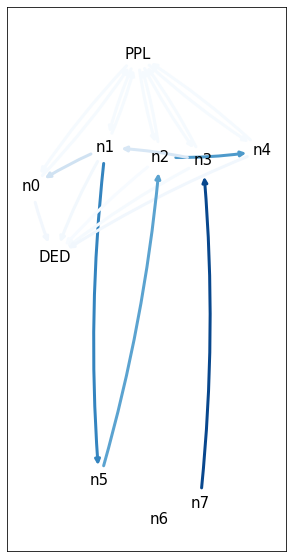

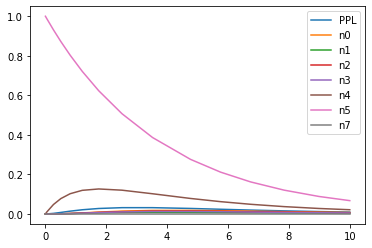

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


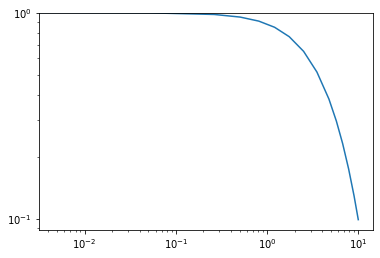

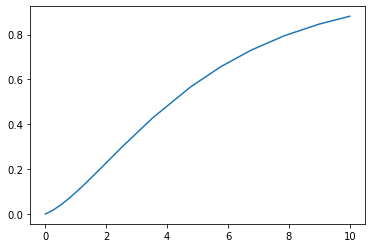

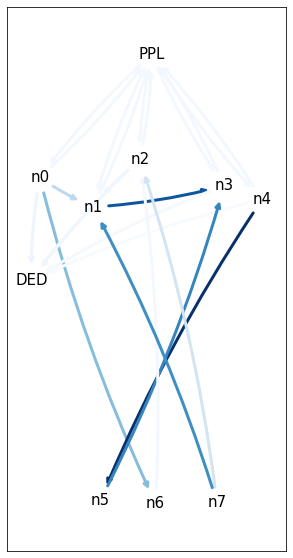

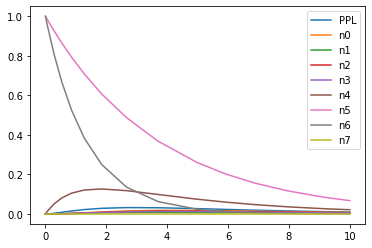

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


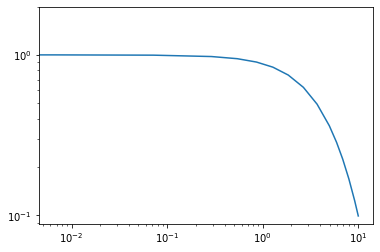

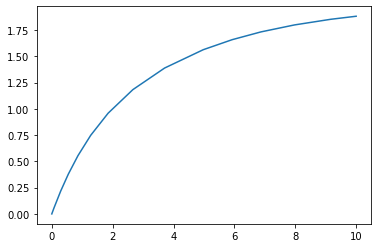

In [284]:
for i in range(10):
    generate_random_one()